# Notebook Navigability

This Jupyter notebook reproduces the results in Figure 5 of the paper which contains two subfigures and relies on the `data_out/nb_first_interactive_cell.csv` intermediate dataset from the processing pipeline.


Figure 5 in the paper contains 2 separate subfigures which are enumerated below:
- 5(a): Heatmap showing the cell position of the first heading element and its level from 0th to 10th cell in the notebook
- 5(b): Line chart showing the cell position of the first table present in notebooks with a navigable table, by excluding notebooks with no tables


## Required Libraries

- `matplotlib`
- `numpy`
- `os`
- `pandas`
- `seaborn`

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import os
import pandas
import seaborn as sns

from matplotlib.colors import LogNorm

matplotlib.rcParams.update({'pdf.fonttype': 42, 'ps.fonttype': 42})

In [2]:
df = pandas.read_csv('data_out/nb_first_interactive_cell.csv')
df.head()

,Filename,H,SequenceNumber,HLevel,T,TSequenceNumber,TDetail
0,serve/light/0da910e07f879f767a4854da9d8edbcda2...,Heading,0.0,1.0,NaN,NaN,NaN
1,serve/light/06658bdce9e03ef4b87a51deb33bda002a...,Heading,0.0,1.0,NaN,NaN,NaN
2,serve/light/505afc3b274e1b0ef3579349ed1ad0a411...,Heading,0.0,1.0,NaN,NaN,NaN
3,serve/light/6e27cc2db681d4e59de933fa96082a0fa1...,Heading,0.0,1.0,NaN,NaN,NaN
4,serve/light/1c5237444b03bfdf01af1100967a702097...,Heading,0.0,1.0,NaN,NaN,NaN


In [3]:
data = df[(df['H'] == 'Heading')].groupby(['HLevel', 'SequenceNumber']).agg({'SequenceNumber': 'count'})

table_data = df[(df['T'] == 'Table')].groupby('TSequenceNumber').agg({'TSequenceNumber': 'count'})
df.columns = ["_".join(x) for x in df.columns.ravel()]

## Apendix Figure (8): Cell Distance to First Interactive Element

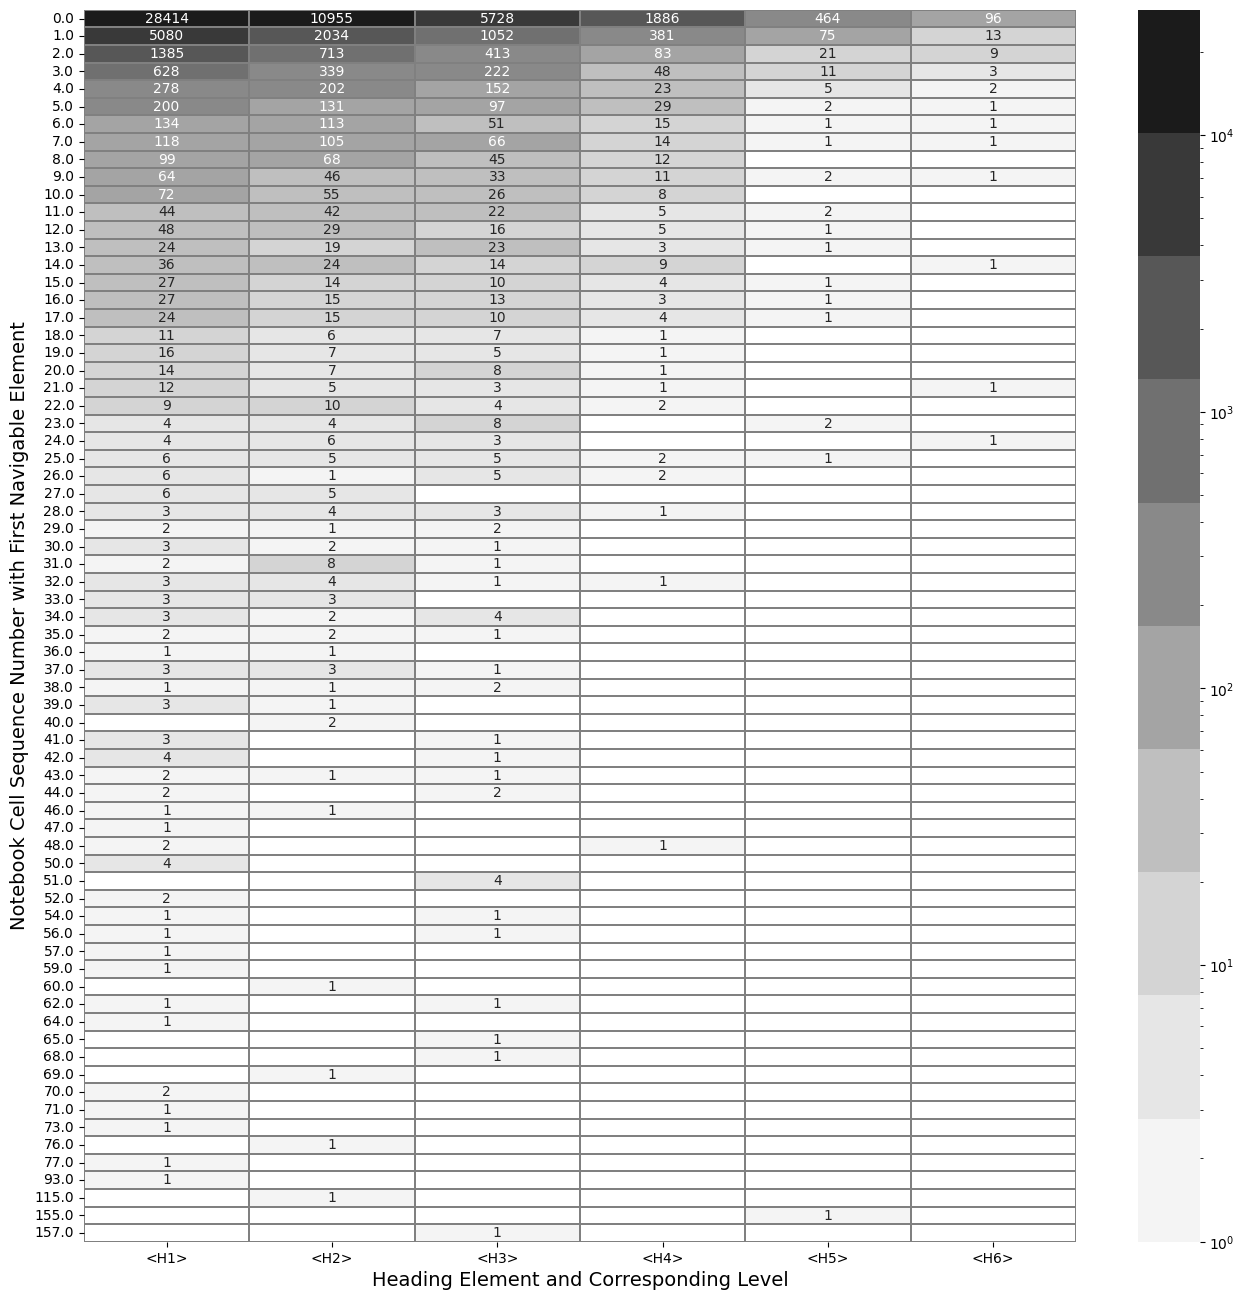

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))
g = sns.heatmap(data.unstack('HLevel'),
            linewidth=.1,
            mask=data.unstack('HLevel').isnull(),
            cmap=sns.color_palette('Greys', 10),
            annot=True,
            xticklabels=['<H1>', '<H2>', '<H3>', '<H4>', '<H5>', '<H6>'],
            robust=True,
            linecolor='gray',
            fmt='g',
            norm=LogNorm())
g.set_facecolor('white')
hatches = ["+"]
for hatch, patch in zip(hatches, g.artists):
    patch.set_hatch(hatch)
ax.set_xlabel('Heading Element and Corresponding Level', fontsize=14)
ax.set_ylabel('Notebook Cell Sequence Number with First Navigable Element', fontsize=14)
plt.savefig('plot_out/fig-a-hlevel_heatmap_detailed.pdf', bbox_inches='tight')

TODO: DESCRIPTION MISSING

----

## Figure 5(a): First Navigable Heading Element

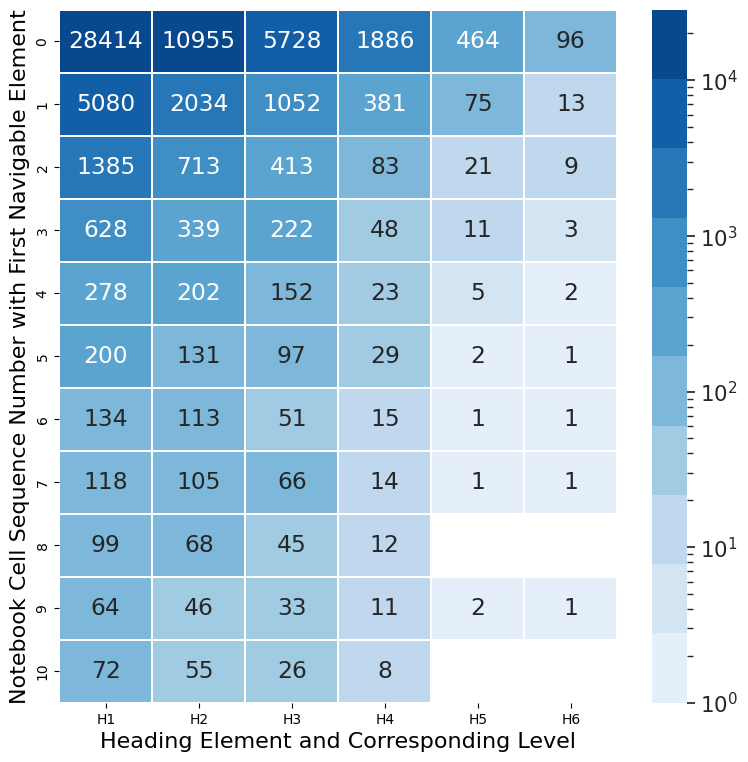

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))
unstacked_data = data.unstack('HLevel')
sns.set(font_scale=1.4)
unstacked_data = unstacked_data.filter(items=[0,1,2,3,4,5,6,7,8,9,10], axis=0)
sns.heatmap(unstacked_data,
            linewidth=0.01,
            cmap=sns.color_palette("Blues", 10),
            annot=True,
            mask=False,
            xticklabels=['H1', 'H2', 'H3', 'H4', 'H5', 'H6'],
            fmt='g',
            norm=LogNorm())
ax.set_xlabel('Heading Element and Corresponding Level', fontsize=16)
ax.set_ylabel('Notebook Cell Sequence Number with First Navigable Element', fontsize=16)
plt.savefig('plot_out/fig-5a-hlevel_heatmap_top_10.pdf', bbox_inches='tight')

**Figure 5(a)** represents a heatmap containing the frequency of headings existing at a cell location of the first occurence of a heading and its corresponding level. The figure is color coded with the Blues color map where the x axis indicates the 6 heading levels and the y axis indicates the numbers starting from 0 to 10 representing the first 11 cells of a notebook. The heatmap contains the highest number 28414 coded as black at the top left corner and is surrounded by smaller numbers in lighter gradients of grey to its right and bottom indicating the occurence of a heading level 2 at cell 0 being more than the occurence of heading level 1 at cell 1. There are two holes indicating no data for H5 at cell 8, 10 and similarly for H6 at cell 8, 10.

-----

## Figure 5(b): Position of the first navigable table

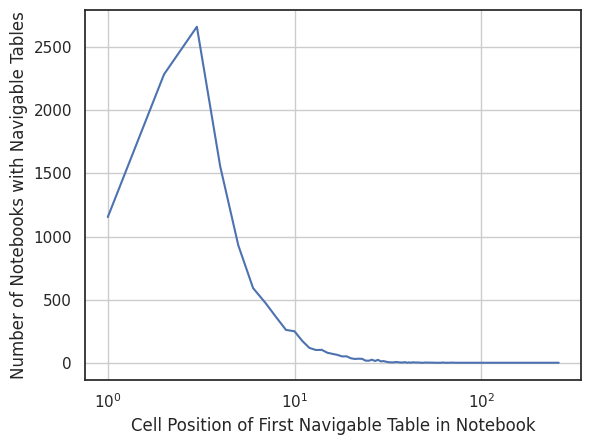

In [6]:
table_data_dict = {}
for index, row in table_data.iterrows():
    table_data_dict[index] = row['TSequenceNumber']

index_keys = sorted(table_data_dict.keys())

X = []
Y = []
for k in index_keys:
    X.append(k+1)
    Y.append(table_data_dict[k])
    

sns.set_theme(style='white')

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(X, Y)
ax.set_ylabel('Number of Notebooks with Navigable Tables')
ax.set_xlabel('Cell Position of First Navigable Table in Notebook')
ax.set_xscale('log')
ax.grid(True)
plt.savefig('plot_out/fig-5b-table_notebook_first_position.pdf', bbox_inches='tight')

**Figure 5(b)**, represents the line chart indicating the frequency of the position of the first navigable table in a notebook. THe line chart's x axis is a log scale representation of the cell position in a noteook, and the y axis indicates the number of notebooks with navigable table elements. The line starts at x=1 and y=1100 and rises up towards 2500 at x=3 and falls sharply until x=10 with a long almost flat tail distribtion until cell 200.

----